In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [7]:
diabetes = pd.read_csv('C:/Users/User/Documents/DM Virgin/diabetes.csv')

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes.shape

(768, 9)

In [11]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_fix:
    diabetes[column] = diabetes[column].replace(0, diabetes[column].median())

print((diabetes[columns_to_fix] == 0).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


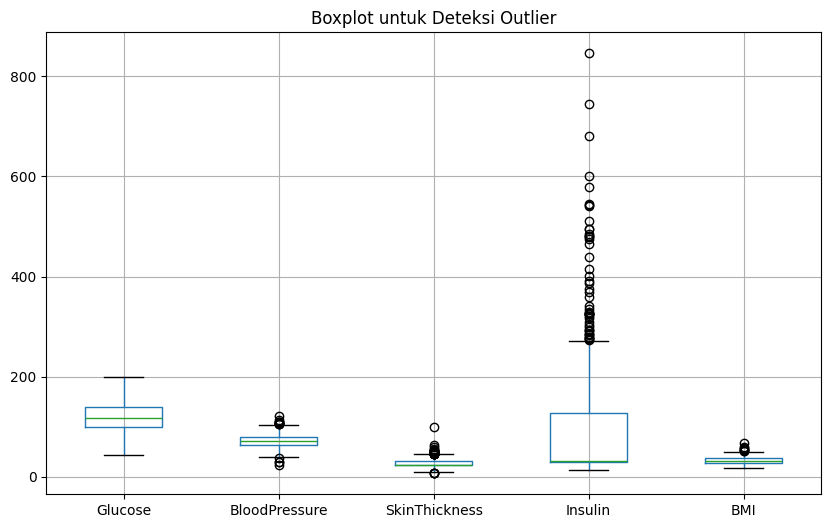

In [17]:
plt.figure(figsize=(10, 6))
diabetes[columns_to_fix].boxplot()
plt.title('Boxplot untuk Deteksi Outlier')
plt.show()

In [21]:
Q1 = diabetes['Insulin'].quantile(0.25)
Q3 = diabetes['Insulin'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

diabetes = diabetes[(diabetes['Insulin'] >= lower_bound) & (diabetes['Insulin'] <= upper_bound)]

In [24]:
print(f"Jumlah duplikat: {diabetes.duplicated().sum()}")

diabetes = diabetes.drop_duplicates()

print(f"Jumlah data setelah menghapus duplikat: {diabetes.shape[0]}")

Jumlah duplikat: 0
Jumlah data setelah menghapus duplikat: 719


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
diabetes[columns_to_fix] = scaler.fit_transform(diabetes[columns_to_fix])

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
diabetes[columns_to_fix] = scaler.fit_transform(diabetes[columns_to_fix])

In [29]:
print(diabetes['Outcome'].value_counts())

Outcome
0    478
1    241
Name: count, dtype: int64


In [32]:
X = diabetes.drop('Glucose', axis=1)
y = diabetes['Glucose']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.6891380229023647


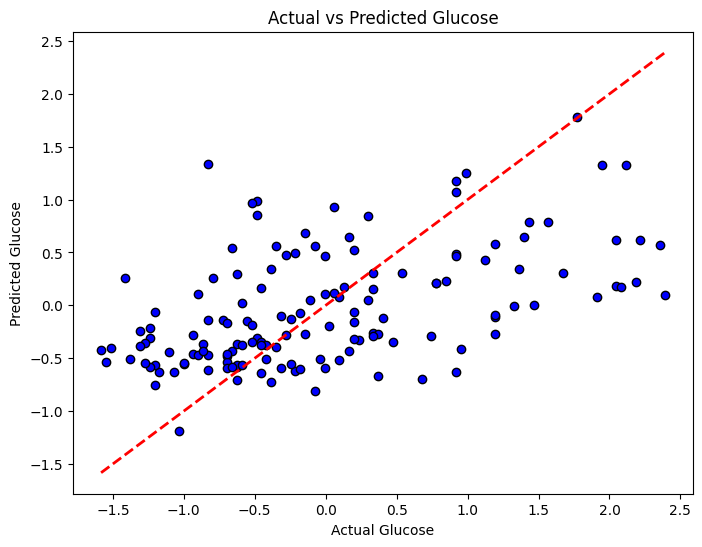

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Glucose')
plt.ylabel('Predicted Glucose')
plt.title('Actual vs Predicted Glucose')
plt.show()

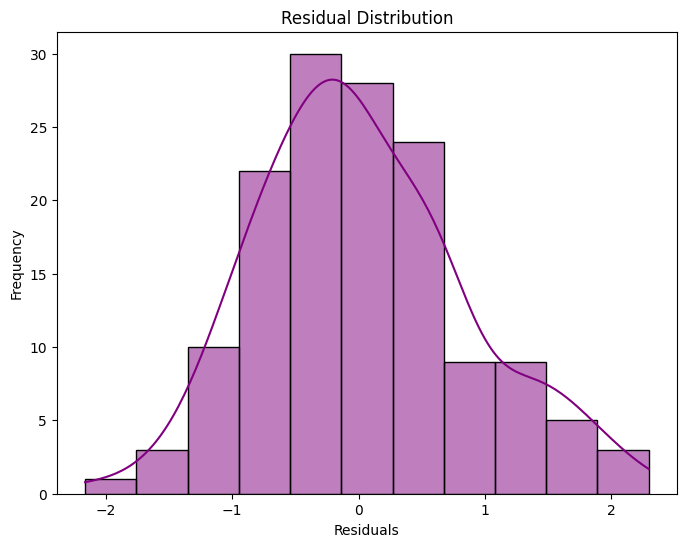

In [40]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [41]:
import joblib

joblib.dump(model, 'linear_regression_model.pkl')
loaded_model = joblib.load('linear_regression_model.pkl')